In [1]:
import pandas as pd
housing=pd.read_csv("C:/Users/sanja/OneDrive/Desktop/Personal/Projects/melbourne_housing_data/Melbourne_housing.csv")

C:\Users\sanja\AppData\Local\Temp\ipykernel_13332\94205625.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  housing=pd.read_csv("C:/Users/sanja/OneDrive/Desktop/Personal/Projects/melbourne_housing_data/Melbourne_housing.csv")


In [2]:
housing.reset_index(drop=True,inplace=True)


In [3]:
housing.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [4]:
housing.groupby('Suburb')["Price"].mean().sort_values(ascending=False).head(10)

Suburb
Canterbury      2.386271e+06
Middle Park     2.232148e+06
Malvern         2.087619e+06
Deepdene        2.001786e+06
Brighton        1.984227e+06
Albert Park     1.927651e+06
Balwyn          1.893712e+06
Camberwell      1.861133e+06
Kew             1.796676e+06
Balwyn North    1.786109e+06
Name: Price, dtype: float64

Text(0, 0.5, 'Avg_Price')

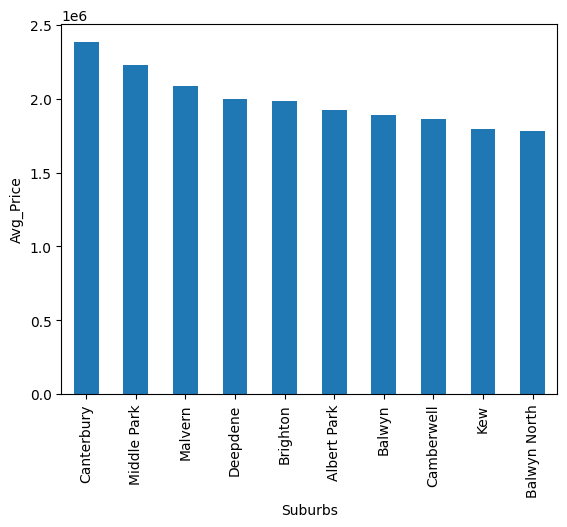

In [5]:
import matplotlib.pyplot as plt
avg_price_by_suburb=housing.groupby('Suburb')["Price"].mean().sort_values(ascending=False).head(10)
avg_price_by_suburb.plot(kind="bar")
plt.xlabel("Suburbs")
plt.ylabel("Avg_Price")

Text(0, 0.5, 'Median prices')

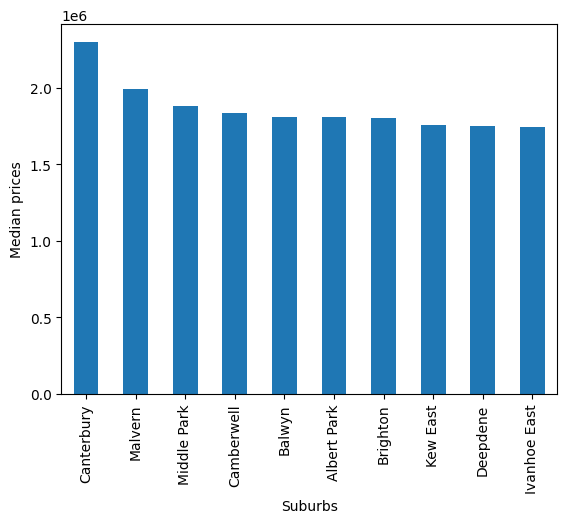

In [6]:
median_prices_by_suburb=housing.groupby("Suburb")["Price"].median().sort_values(ascending=False).head(10)
import matplotlib.pyplot as plt
median_prices_by_suburb.plot(kind="bar")
plt.xlabel("Suburbs")
plt.ylabel("Median prices")

Rooms
16    5.000000e+06
12    2.705000e+06
10    2.018000e+06
6     1.882613e+06
5     1.818862e+06
Name: Price, dtype: float64


Text(0, 0.5, 'Average prices')

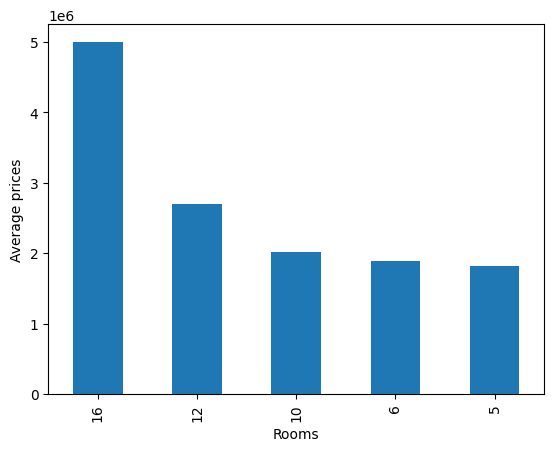

In [7]:
prices_by_rooms=housing.groupby("Rooms")["Price"].mean().sort_values(ascending=False).head()
print(prices_by_rooms)
prices_by_rooms.plot(kind="bar")
plt.xlabel("Rooms")
plt.ylabel("Average prices")

In [10]:
top_sellers=housing['SellerG'].value_counts().sort_values(ascending=False).head(5)
print(top_sellers)

SellerG
Jellis           3359
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
Name: count, dtype: int64


In [13]:
highest_sale = housing.loc[housing['Price'].idxmax(), ['SellerG', 'Price']]
print(highest_sale)


SellerG    hockingstuart
Price         11200000.0
Name: 32774, dtype: object


Text(0, 0.5, 'Count')

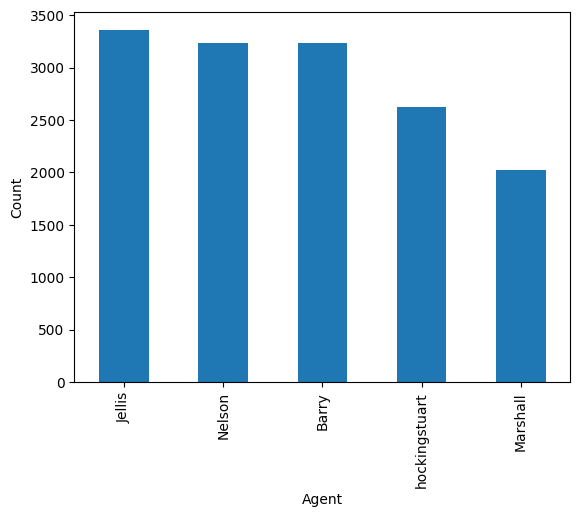

In [14]:
top_sellers.plot(kind="bar")
plt.xlabel("Agent")
plt.ylabel("Count")

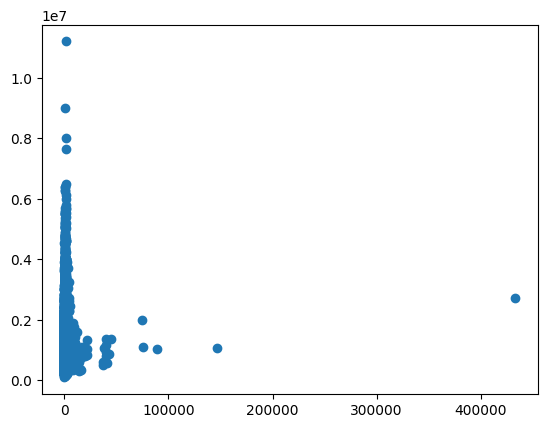

In [16]:
plt.scatter(housing["Landsize"],housing["Price"])

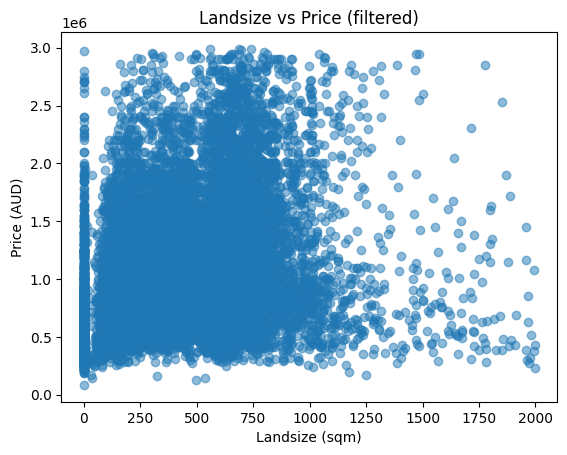

In [17]:
# Filter out extreme outliers
filtered = housing[(housing["Landsize"] < 2000) & (housing["Price"] < 3_000_000)]

plt.scatter(filtered["Landsize"], filtered["Price"], alpha=0.5)
plt.xlabel("Landsize (sqm)")
plt.ylabel("Price (AUD)")
plt.title("Landsize vs Price (filtered)")
plt.show()


In [18]:
housing['Date']=pd.to_datetime(housing['Date'],dayfirst=True,errors='coerce')
housing['Year']=housing['Date'].dt.year

In [20]:
avg_price_by_year = housing.groupby('Year')['Price'].mean().reset_index()
print(avg_price_by_year)


   Year         Price
0  2016  1.063227e+06
1  2017  1.051144e+06
2  2018  1.017458e+06


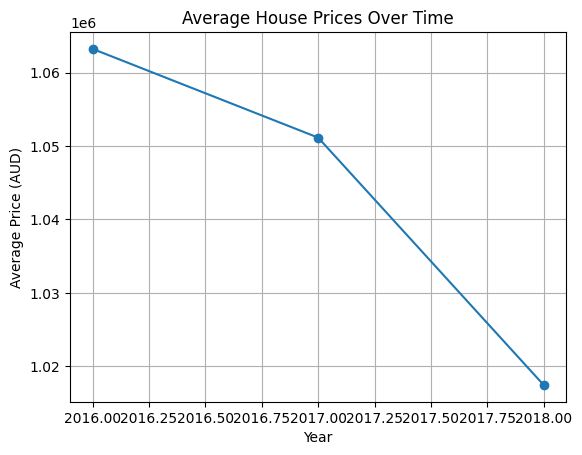

In [21]:
import matplotlib.pyplot as plt

plt.plot(avg_price_by_year['Year'], avg_price_by_year['Price'], marker='o')
plt.title("Average House Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price (AUD)")
plt.grid(True)
plt.show()


<Axes: xlabel='Bedroom'>

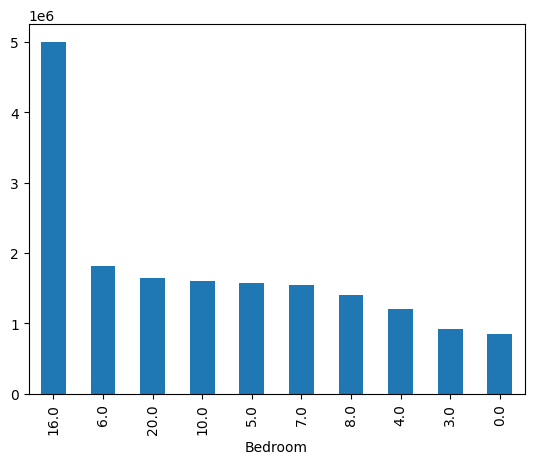

In [53]:
avg_price_by_bedrooms=housing.groupby("Bedroom")["Price"].median().sort_values(ascending=False).head(10)
avg_price_by_bedrooms.plot(kind="bar")

Text(0, 0.5, 'Median Price')

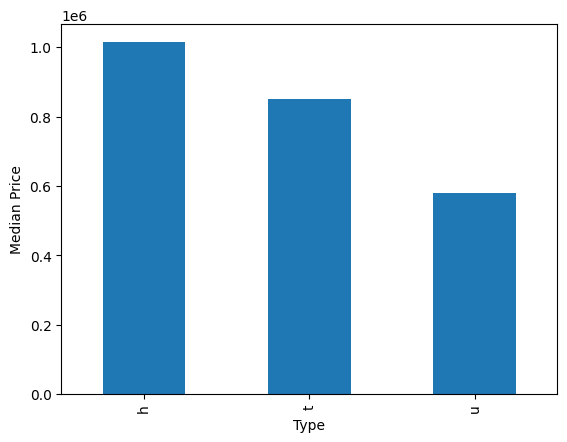

In [51]:
compare_by_type=housing.groupby("Type")["Price"].median().sort_values(ascending=False).head(10)
compare_by_type.plot(kind="bar")
plt.ylabel("Median Price")

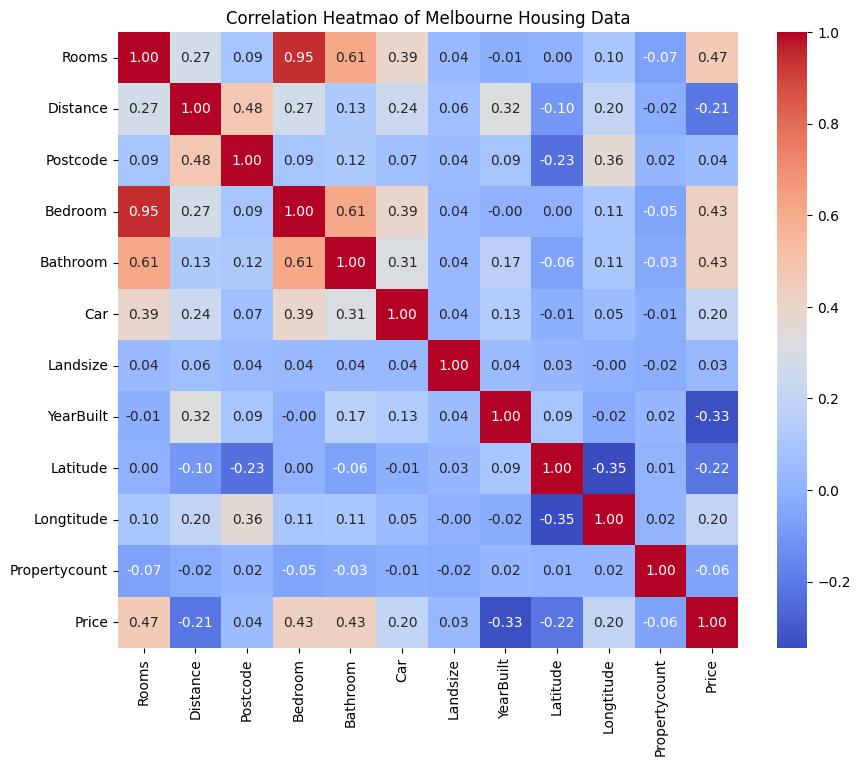

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols=housing.select_dtypes(include=['float64','int64'])
corr=numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f",cbar=True)
plt.title("Correlation Heatmao of Melbourne Housing Data")
plt.show()